In [1]:
from beir.datasets.data_loader import GenericDataLoader
from beir.retrieval.search.dense import FlatIPFaissSearch
from modeling_retriever import LongtrieverRetriever
from modeling_longtriever import Longtriever

import os
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import dotenv
dotenv.load_dotenv()
STORAGE_DIR = os.getenv("STORAGE_DIR")


/Tmp/lvpoellhuber/bmir-env/lib/python3.12/site-packages/beir/datasets/data_loader.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
[nltk_data] Downloading package punkt to /u/poellhul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
def plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, title, normalize=False):
    query_corpus = []
    for qid in qrels:
        docid = list(qrels[qid].keys())[0]
        query_corpus.append(corpus[docid])

    corpus_embeddings = biencoder.encode_corpus(query_corpus, batch_size=batch_size, normalize=normalize)
    query_embeddings = biencoder.encode_queries(list(queries.values()), batch_size=batch_size, normalize=normalize)

    corpus_pca = PCA(n_components=2)
    projected_corpus_embeds = corpus_pca.fit_transform(corpus_embeddings)

    query_pca = PCA(n_components=2)
    projected_query_embeds = query_pca.fit_transform(query_embeddings)
    
    plt.plot(projected_corpus_embeds[:, 0], projected_corpus_embeds[:, 1], 'ro', markersize=2, label="corpus")
    plt.plot(projected_query_embeds[:, 0], projected_query_embeds[:, 1], 'bo', markersize=2, label="queries")
    plt.title(title)
    plt.legend()
    plt.show()

# OG Longtriever FP16 LR 1e-5

In [4]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/longtriever_og/init_test"
batch_size = 6
task = "msmarco-doc-short"

biencoder = LongtrieverRetriever(Longtriever.from_pretrained(biencoder_path))
    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")

100%|██████████| 256146/256146 [00:03<00:00, 76865.51it/s]


100%|██████████| 70/70 [00:00<00:00, 96.06it/s]


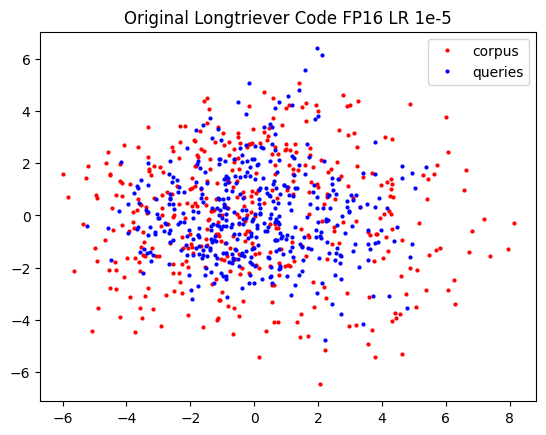

In [5]:
plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "Original Longtriever Code FP16 LR 1e-5")

# OG Longtriever FP32 LR 1e-4

In [7]:
# Main arguments
biencoder_path = "/Tmp/lvpoellhuber/models/longtriever_og/init_test"
batch_size = 6
task = "msmarco-doc-short"

biencoder = LongtrieverRetriever(Longtriever.from_pretrained(biencoder_path))
    
biencoder.eval()

faiss_search = FlatIPFaissSearch(biencoder, batch_size=batch_size)

data_path = os.path.join(STORAGE_DIR, "datasets", task)
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")

100%|██████████| 256146/256146 [00:03<00:00, 76937.97it/s]


100%|██████████| 70/70 [00:00<00:00, 94.57it/s]


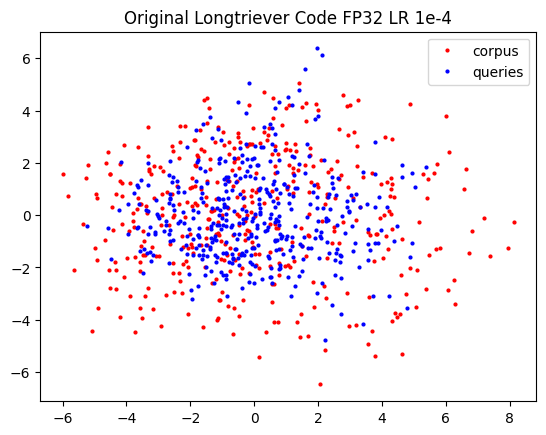

In [8]:
plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "Original Longtriever Code FP32 LR 1e-4")

# Normalized FP32

  0%|          | 0/70 [00:00<?, ?it/s]

100%|██████████| 70/70 [00:00<00:00, 93.47it/s]


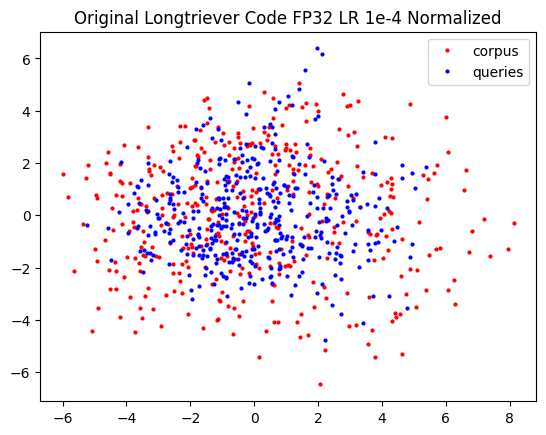

In [14]:
plot_embedding_pca(biencoder, corpus, queries, qrels, batch_size, "Original Longtriever Code FP32 LR 1e-4 Normalized", normalize=True)